In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Descriptive Statistics

In [3]:
df.describe(include='all') # categorical features are also included with parameter include=all

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Missing value imputation

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Graphical representation

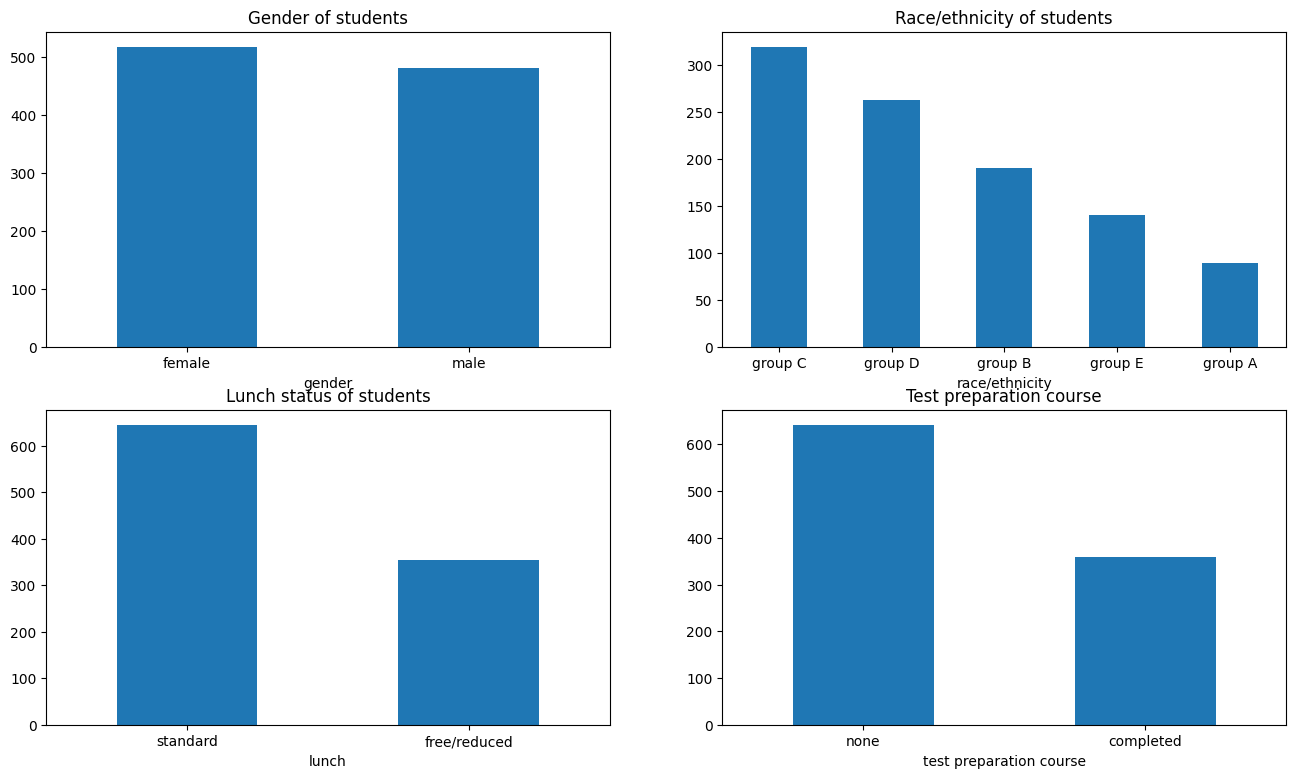

In [5]:
# Unvariate Analysis
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')
plt.xticks(rotation=0)

plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')
plt.xticks(rotation=0)

plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')
plt.xticks(rotation=0)

plt.show()

<Axes: >

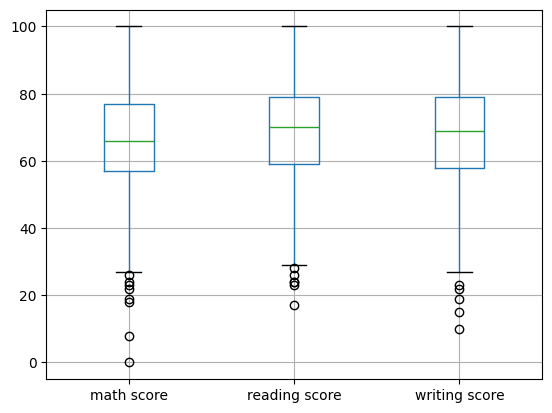

In [6]:
# boxplot for df
df.boxplot()

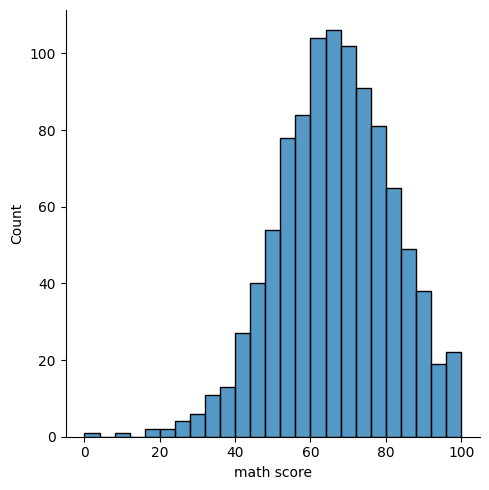

In [7]:
sns.displot(df['math score'])

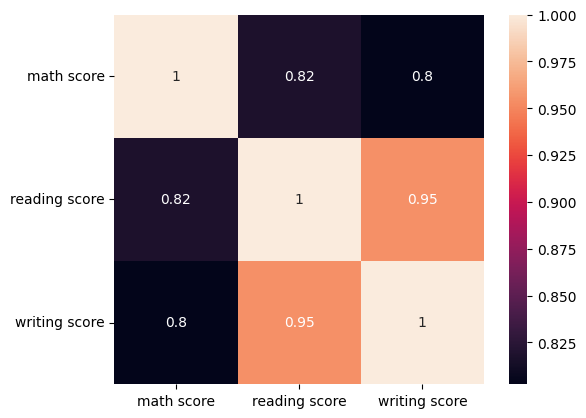

In [8]:
# Correlation between three scores
numeric_df = df[['math score', 'reading score', 'writing score']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation = 0)
plt.show()

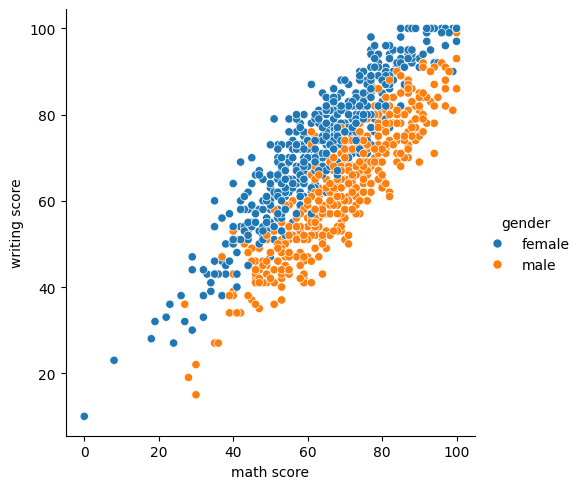

In [9]:
# relational plot between 2 variables
sns.relplot(x='math score', y='writing score', hue='gender', data=df)

<Axes: >

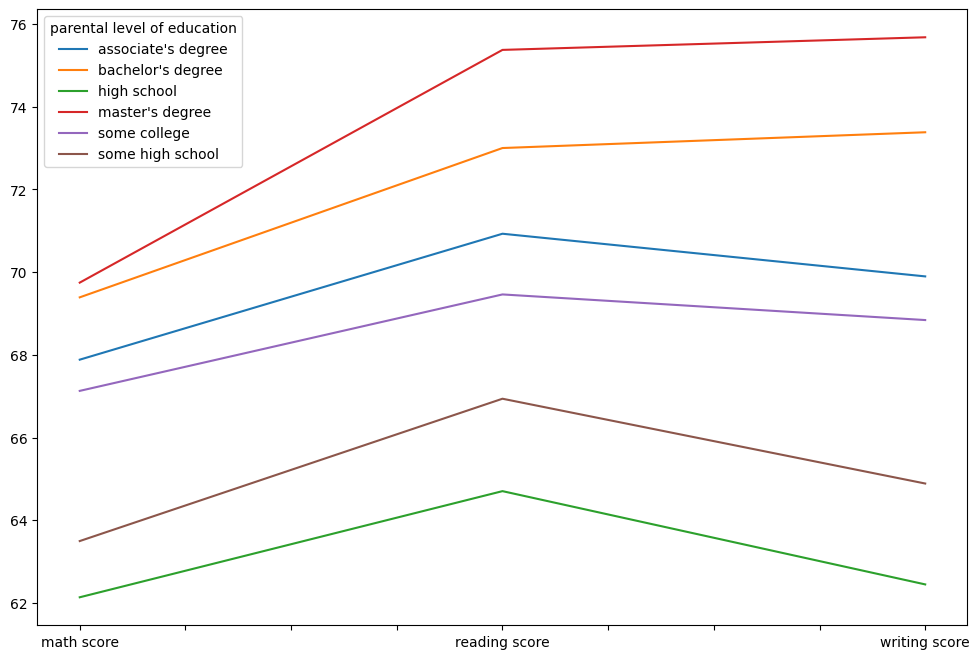

In [11]:
# scores based on parents education
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

<Axes: >

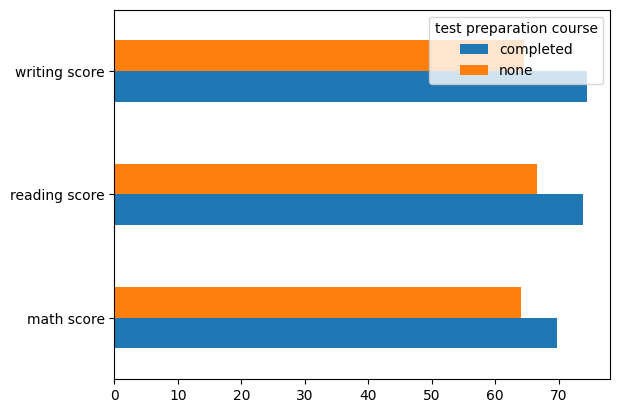

In [12]:
# horizontal bar graph for scores based on test preparation
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh')